# SVM

In [1]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
from pprint import pprint
import datasets as datasets
from sklearn.model_selection import GridSearchCV

# Importacion SVM
from sklearn.svm import SVC

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

# Analisis de hiperparametros 
# Grid Search con Cross Validation

In [2]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [3]:
svc = SVC(probability=True)

In [4]:
gamma= ['scale', 'auto']
shrinking= [True, False]

In [5]:
param_grid  = {
               'gamma': gamma,
               'shrinking': shrinking}

In [6]:
pprint(param_grid)

{'gamma': ['scale', 'auto'], 'shrinking': [True, False]}


In [7]:
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [8]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [9]:
grid_search.best_params_

{'gamma': 'scale', 'shrinking': True}

# Entrenamiento con todos los features

In [10]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [11]:
clf_con_todos_los_features = SVC(probability=True, gamma='scale', shrinking=True)
clf_con_todos_los_features.fit(X_train, y_train)
y_pred = clf_con_todos_los_features.predict(X_test)

# Metricas

Accuracy: 0.831874712114233

Precision: 0.7562568008705114

Recall: 0.9547200323428341

F1 Score: 0.5593561368209256

Matriz de confusion: 
[[4723  224]
 [ 871  695]]

AUC-ROC: 



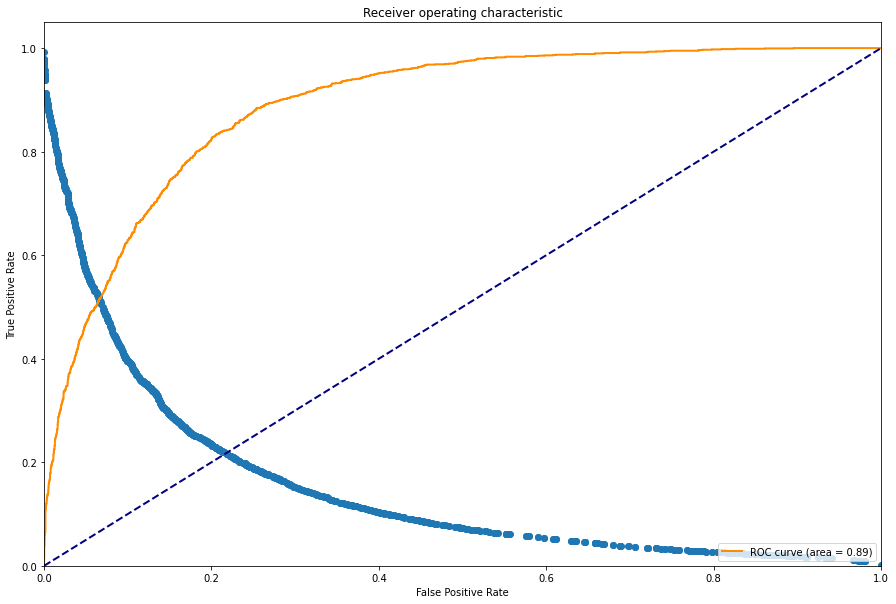

0.889491960890161

In [12]:
m.getMetrics(y_test, y_pred, clf_con_todos_los_features.predict_proba(X_test)[:,1])

# Entrenamiento con seleccion

In [13]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [14]:
clf_con_seleccion = SVC(probability=True, gamma='scale', shrinking=True)
clf_con_seleccion.fit(X_train, y_train)
y_pred = clf_con_seleccion.predict(X_test)

# Metricas

Accuracy: 0.8212805158912944

Precision: 0.6520423600605144

Recall: 0.9070143521326056

F1 Score: 0.5969529085872576

Matriz de confusion: 
[[4487  460]
 [ 704  862]]

AUC-ROC: 



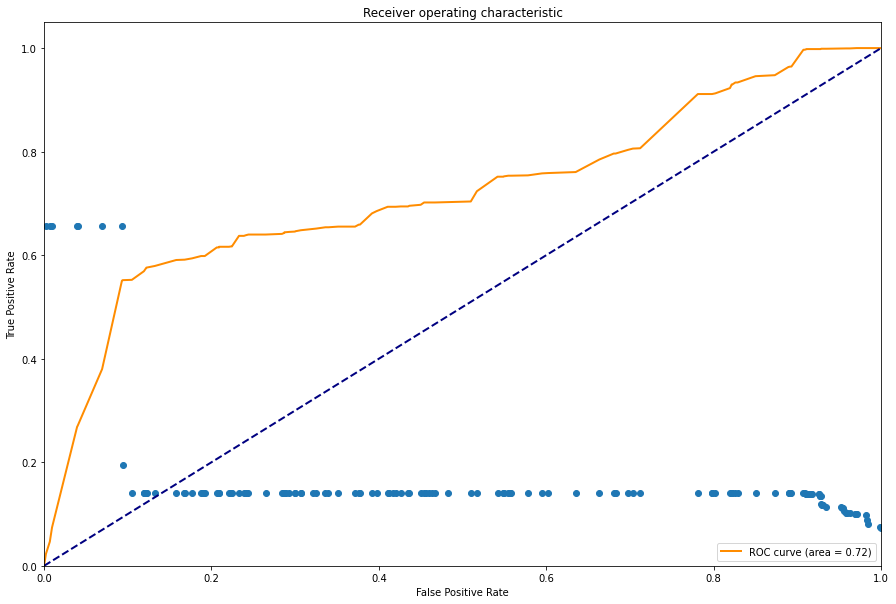

0.7193904170929606

In [15]:
m.getMetrics(y_test, y_pred, clf_con_seleccion.predict_proba(X_test)[:,1])

# Prediccion

In [17]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataHoldout()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.preprocessing_con_todos_los_features(dfObjetivo)

predicciones = clf_con_todos_los_features.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
fp.exportPredictions(fp.formatPredictions(predicciones), "SVM")